# **Final Project**

In [1]:
import os
import sys
import cv2
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon
import csv
import random

## 3. Dataset

Load Source Dataset (done locally)

In [2]:
path =os.path.join('..', 'QC')
np.set_printoptions(threshold=sys.maxsize)


In [3]:
rgb_dir = os.path.join(path, "rgb")
mask_dir = os.path.join(path, "mask")
csv_dir = os.path.join(path, "csv")

image_files = os.listdir(rgb_dir)
mask_files = os.listdir(mask_dir)
csv_files = os.listdir(csv_dir)

image_files.sort()
mask_files.sort()
csv_files.sort()

3.1 Plot Images for Sample Subject

In [6]:
def plot_sample(id):
    image_path = os.path.join(rgb_dir, id)
    image = cv2.imread(image_path + '.png')
    
    mask_path = os.path.join(mask_dir, id)
    mask = cv2.imread(mask_path + '.png')

    image = cv2.imread(image_path + '.png')
    
    # choose the first patient
    df = pd.read_csv(os.path.join(csv_dir, id + '.csv')) 


    fontsize= 20
    plt.rcParams["figure.figsize"] = (20,6)
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)

    plt.subplot(131)
    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax1.axis('off')
    plt.title('Original image',fontsize=fontsize)

    plt.subplot(132)
    ax2.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
    ax2.axis('off')
    plt.title('Mask',fontsize=fontsize)


    plt.subplot(133)
    ax3.imshow(image)
    ax3.axis('off')
    plt.title('Mask overlayed on Original Image',fontsize=fontsize)

    for i in range(df.shape[0]):

        if(df['type'][i]=='rectangle'):
            height = df['ymax'][i]-df['ymin'][i] 
            width = df['xmax'][i]-df['xmin'][i]
            patch = Rectangle((df['xmin'][i], df['ymin'][i]), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax3.add_patch(patch)


        elif df['type'][i] == 'polyline':
            x = list(map(float, df['coords_x'][i].split(',')))
            y = list(map(float, df['coords_y'][i].split(',')))

            coords = list(zip(x, y))  # Combine x and y coordinates into tuples
            patch = Polygon(coords, linewidth=3, edgecolor='r', facecolor='none')  # Ensure only one polygon is added
            ax3.add_patch(patch)

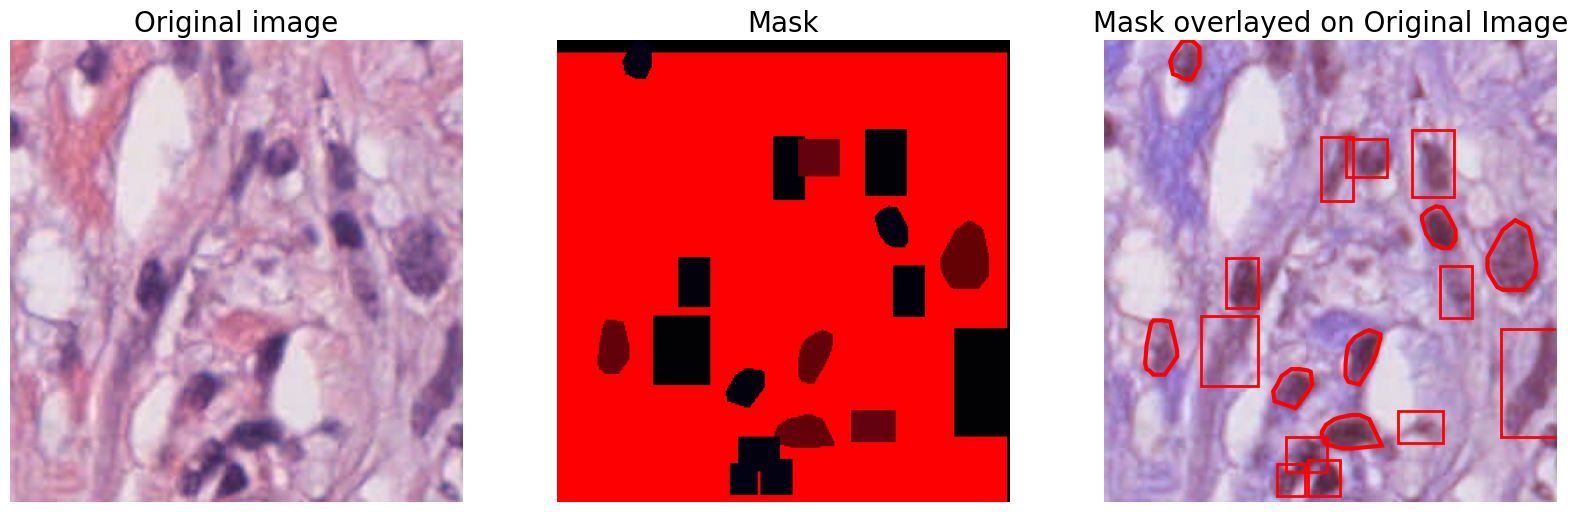

In [21]:
subject_id = "TCGA-A1-A0SP-DX1_id-5ea4095addda5f8398977ebc_left-7053_top-53967_bottom-54231_right-7311"

plot_sample(subject_id)

3.2 Split Set: Training and Validation

In [7]:
# make folder for split
split_dir = os.path.join(path, "split")
os.makedirs(split_dir, exist_ok=True)

#all files names in RBG folder
filenames = os.listdir(rgb_dir)

#get all unique ids
unique_patient_ids = set()
for filename in filenames:
    # Extract the unique patient ID (first 4 parts of the filename)
    parts = filename.split("-")
    patient_id = "-".join(parts[:4])  # Combine first 4 parts
    patient_id = patient_id.split("_")[0]
    
    unique_patient_ids.add(patient_id)

unique_patient_ids = list(unique_patient_ids)
# Shuffle the list to ensure randomness
random.shuffle(unique_patient_ids)

In [8]:
#Split into training and validation sets (80% training, 20% validation)
split_index = int(0.8 * len(unique_patient_ids))
train_patient_ids = unique_patient_ids[:split_index]
validate_patient_ids = unique_patient_ids[split_index:]

In [9]:
# Save training patient IDs to trainsubjects.csv
with open(os.path.join(split_dir, "train_subjects.csv"), "w", newline="") as train_file:
    writer = csv.writer(train_file)
    writer.writerow(["PatientID"])  # Write header
    for patient_id in train_patient_ids:
        writer.writerow([patient_id])

# Save validation patient IDs to validatesubjects.csv
with open(os.path.join(split_dir, "validate_subjects.csv"), "w", newline="") as validate_file:
    writer = csv.writer(validate_file)
    writer.writerow(["PatientID"])  # Write header
    for patient_id in validate_patient_ids:
        writer.writerow([patient_id])